<a href="https://colab.research.google.com/github/camilotorron/TestNotebooks/blob/main/MissingValuesOptions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get and understand data

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/paramitadas1/Handling-missing-values-in-Python-Explained-with-example/main/missing.csv')
data.shape

(1056, 6)

In [3]:
data.head()

,Location_code,Level,Frequency,CPR,Units,Connectivity
0,LA,level 4,Monthly,76.0,NaN,979.2
1,LA,level 1,Weekly,80.0,379.1,1125.2
2,NaN,level 1,Daily,71.0,131.6,NaN
3,TL,level 4,Monthly,32.0,118.1,NaN
4,TL,level 2,Once,116.0,595.1,1503.2


In [4]:
data.isnull().sum()

Location_code    143
Level             52
Frequency         65
CPR               29
Units            167
Connectivity     214
dtype: int64

In [10]:
data['Location_code'].value_counts(dropna=False)

TL     270
CCA    234
LA     157
NaN    143
GK     103
CCM     86
UDL     63
Name: Location_code, dtype: int64

In [11]:
data['Level'].value_counts(dropna=False)

level  1    336
level  2    310
level 4     211
level 3     147
NaN          52
Name: Level, dtype: int64

In [20]:
data['Level'].replace(['nivel 1', 'nivel2'], ['level 1', 'level 2'], inplace = True)

In [22]:
data['Level'].value_counts(dropna=False)

level 1    336
level 2    310
level 4    211
level 3    147
NaN         52
Name: Level, dtype: int64

In [24]:
data['Frequency'].value_counts(dropna=False)

Daily      309
Weekly     214
Monthly    213
Once       169
NaN         65
Never       44
Yearly      42
Name: Frequency, dtype: int64

In [25]:
data['CPR'].value_counts(dropna=False)

NaN      29
80.0     17
103.0    17
92.0     15
32.0     15
         ..
38.0      5
99.0      5
101.0     4
100.0     4
60.0      3
Name: CPR, Length: 102, dtype: int64

In [27]:
data.dtypes

Location_code     object
Level             object
Frequency         object
CPR              float64
Units            float64
Connectivity     float64
dtype: object

In [28]:
data.describe()

,CPR,Units,Connectivity
count,1027.000000,889.000000,842.000000
mean,69.032132,395.022835,979.870546
std,29.246015,195.112060,475.058543
min,20.000000,61.000000,205.000000
25%,44.000000,226.100000,589.200000
50%,68.000000,397.100000,1007.200000
75%,93.000000,563.600000,1391.200000
max,120.000000,739.100000,1952.200000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


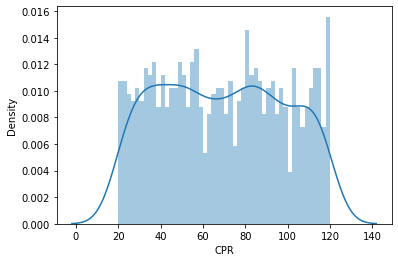

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(data['CPR'],bins = 50)

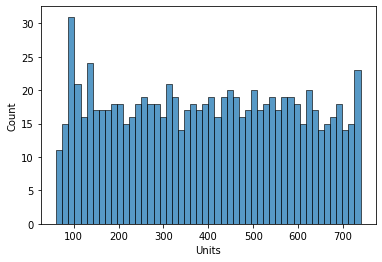

In [43]:
sns.histplot(data['Units'], bins = 50)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


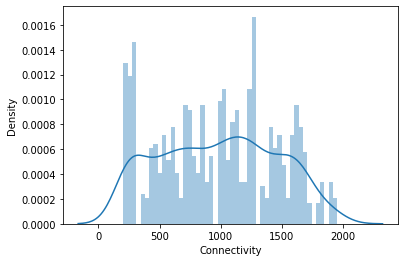

In [42]:
sns.distplot(data['Connectivity'], bins = 50)

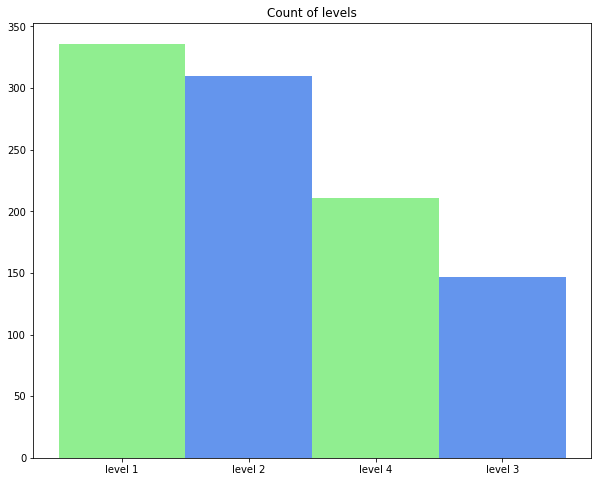

In [45]:
plt.figure(figsize=(10,8))
plt.bar(data['Level'].value_counts().index,data['Level'].value_counts().values,width = 1, color=["lightgreen", "cornflowerblue"])
plt.title('Count of levels')
plt.show()


# Handling missing values

In [46]:
df = data.copy()
df.shape

(1056, 6)

In [48]:
df.head()

,Location_code,Level,Frequency,CPR,Units,Connectivity
0,LA,level 4,Monthly,76.0,NaN,979.2
1,LA,level 1,Weekly,80.0,379.1,1125.2
2,NaN,level 1,Daily,71.0,131.6,NaN
3,TL,level 4,Monthly,32.0,118.1,NaN
4,TL,level 2,Once,116.0,595.1,1503.2


In [49]:
df.isna().sum()

Location_code    143
Level             52
Frequency         65
CPR               29
Units            167
Connectivity     214
dtype: int64

## Mean imputation

### fillna()

In [52]:
import numpy as np

#For numerical values
mean_cpr= np.mean(df['CPR'])
df['CPR'].fillna(mean_cpr, inplace = True)
df['CPR'].isna().sum()

0

In [54]:
from statistics import mode

#For categorical values
mode_level = mode(df['Level'])
df['Level'].fillna(mode_level, inplace = True)
df['Level'].isna().sum()


0

### sklearn simpleimputer

In [55]:
df = data.copy()
df.isna().sum()

Location_code    143
Level             52
Frequency         65
CPR               29
Units            167
Connectivity     214
dtype: int64

In [58]:
from sklearn.impute import SimpleImputer

#For numeric values
mean = SimpleImputer(strategy='mean')
df[['CPR']] = mean.fit_transform(df[['CPR']])
df['CPR'].isna().sum()

0

In [62]:
#For categorical values
mode = SimpleImputer(strategy='most_frequent')
df[['Level']] = mode.fit_transform(df[['Level']])
df['Level'].isna().sum()

0

## Create separate category

In [ ]:
df = data.copy()
df.isna().sum()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


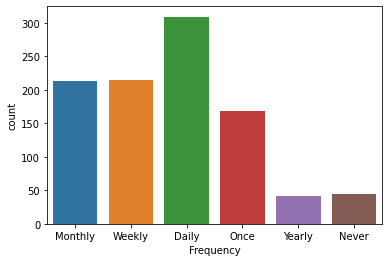

In [66]:
sns.countplot(df['Frequency'])

In [67]:
df['Frequency'].isna().sum()

65

In [69]:
new_category = SimpleImputer(strategy = 'constant')
df[['Frequency']] = new_category.fit_transform(df[['Frequency']])
df['Frequency'].value_counts(dropna = False)

Daily            309
Weekly           214
Monthly          213
Once             169
missing_value     65
Never             44
Yearly            42
Name: Frequency, dtype: int64

In [70]:
df['Frequency'].isna().sum()

0

## Model imputation

Build a regression model to predict the missing values

In [71]:
df = data.copy()
df.isna().sum()

Location_code    143
Level             52
Frequency         65
CPR               29
Units            167
Connectivity     214
dtype: int64

#### Let's fill Unit and Connectivity


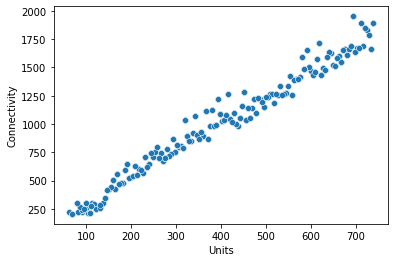

In [81]:
sns.scatterplot(x=df['Units'], y = df['Connectivity'])

Units and Connectivity have a linear correlation so a linear regression model can work.

In [91]:
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

itr = IterativeImputer(estimator = LinearRegression())
df[['Units', 'Connectivity']]= itr.fit_transform(df[['Units', 'Connectivity']])
df.isna().sum()

Location_code    143
Level             52
Frequency         65
CPR               29
Units              0
Connectivity       0
dtype: int64

#### Let's fill CPR

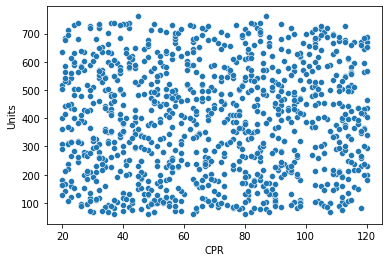

In [93]:
sns.scatterplot(x=df['CPR'],y = df['Units'])

In [96]:
from sklearn.ensemble import RandomForestRegressor
itr2 = IterativeImputer(estimator= RandomForestRegressor())
df[['CPR','Units']] = itr2.fit_transform(df[['CPR', 'Units']])
df.isna().sum()


/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


Location_code    143
Level             52
Frequency         65
CPR                0
Units              0
Connectivity       0
dtype: int64

## KNN

Use KNN to predict the missing values. Take the points with no missing values near the one to predict and impute the average of the neighbours.

In [98]:
df = data.copy()
df.isna().sum()

Location_code    143
Level             52
Frequency         65
CPR               29
Units            167
Connectivity     214
dtype: int64

In [101]:
from sklearn.impute import KNNImputer

knnImp = KNNImputer(n_neighbors = 4)
df[['Units', 'Connectivity']] = knnImp.fit_transform(df[['Units', 'Connectivity']])
df[['Units', 'Connectivity']].isna().sum()

Units           0
Connectivity    0
dtype: int64

In [112]:
listaNA=data[data['Units'].isna()].index

#Rows with nan before imputing
data.iloc[listaNA]

,Location_code,Level,Frequency,CPR,Units,Connectivity
0,LA,level 4,Monthly,76.0,NaN,979.2
5,TL,level 2,Daily,110.0,NaN,749.2
6,TL,level 2,Monthly,46.0,NaN,867.2
22,TL,level 2,Yearly,57.0,NaN,1219.2
23,NaN,level 2,Once,99.0,NaN,1430.2
...,...,...,...,...,...,...
1047,CCA,level 1,Daily,30.0,NaN,845.2
1049,LA,level 1,Daily,25.0,NaN,1266.2
1050,CCA,level 4,Monthly,29.0,NaN,218.0
1052,NaN,level 1,Weekly,108.0,NaN,905.2


In [113]:
#Rows after imputing
df.iloc[listaNA]

,Location_code,Level,Frequency,CPR,Units,Connectivity
0,LA,level 4,Monthly,76.0,383.600,979.2
5,TL,level 2,Daily,110.0,298.100,749.2
6,TL,level 2,Monthly,46.0,312.725,867.2
22,TL,level 2,Yearly,57.0,473.600,1219.2
23,NaN,level 2,Once,99.0,604.100,1430.2
...,...,...,...,...,...,...
1047,CCA,level 1,Daily,30.0,334.100,845.2
1049,LA,level 1,Daily,25.0,520.850,1266.2
1050,CCA,level 4,Monthly,29.0,85.050,218.0
1052,NaN,level 1,Weekly,108.0,347.600,905.2


## Delete rows/columns

In [115]:
df = data.copy()
df.isna().sum()

Location_code    143
Level             52
Frequency         65
CPR               29
Units            167
Connectivity     214
dtype: int64

Check if how many missing values has a row

In [120]:
df.isna().sum(axis=1).value_counts()

0    497
1    459
2     91
3      7
4      2
dtype: int64

All rows with more than 2 missing values

In [121]:
df[df.isna().sum(axis = 1)>2]

,Location_code,Level,Frequency,CPR,Units,Connectivity
40,NaN,NaN,NaN,45.0,523.1,NaN
41,NaN,NaN,NaN,96.0,244.1,746.2
179,NaN,level 2,NaN,54.0,410.6,NaN
244,NaN,level 4,NaN,56.0,257.6,NaN
285,NaN,level 1,Daily,NaN,491.6,NaN
486,NaN,NaN,NaN,24.0,730.1,1789.2
510,NaN,level 3,Daily,NaN,NaN,1628.2
811,GK,NaN,NaN,66.0,460.1,NaN
886,NaN,NaN,NaN,100.0,451.1,NaN


Get the index of these rows and drop them from the dataframe

In [124]:
indices = df[df.isna().sum(axis = 1)>2].index
df.drop(indices, inplace = True)

In [127]:
df.isna().sum(axis=1).value_counts()

0    497
1    459
2     91
dtype: int64